<a href="https://colab.research.google.com/github/UswatunH06/Uswatun-H/blob/main/Model_KNN_BMKG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === 1. Baca data Desember 2024 (data latih) ===
file_path = '/content/df2_2020-2024.xlsx'  # Ganti dengan path yang sesuai
data_2024 = pd.read_excel(file_path)

# Ubah kolom TANGGAL menjadi datetime
data_2024['TANGGAL'] = pd.to_datetime(data_2024['TANGGAL'], format='%d-%m-%Y')

# === 2. Pisahkan variabel prediktor dan respon untuk data latih ===
X = data_2024[['TAVG', 'SS']]  # Variabel prediktor
y = data_2024['RH_AVG']  # Variabel respon

# === 3. Standarisasi variabel prediktor ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 4. Train-test split (80% train, 20% test) ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# === 5. Latih model K-Nearest Neighbors ===
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# === 6. Evaluasi model pada data latih ===
y_pred_train = knn.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print("\nEvaluasi Error untuk Prediksi pada Data Latih:")
print(f"MAE: {mae_train:.4f}, MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}")

# === 7. Evaluasi model pada data uji ===
y_pred_test = knn.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nEvaluasi Error untuk Prediksi pada Data Uji:")
print(f"MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

# === 8. Baca data Januari 2025 (data prediksi) ===
file_path_januari_2025 = '/content/jan 2025.xlsx'
data_januari_2025 = pd.read_excel(file_path_januari_2025)

# Ubah kolom TANGGAL menjadi datetime
# Ubah kolom TANGGAL menjadi datetime
data_januari_2025['TANGGAL'] = pd.to_datetime(data_januari_2025['TANGGAL'], format='%d-%m-%Y')
# The format was changed from '%m-%d-%Y' to '%d-%m-%Y' to match the format of the date strings in the data.
# === 9. Prediksi untuk Januari 2025 ===
X_januari_2025 = data_januari_2025[['TAVG', 'SS']]
X_januari_2025_scaled = scaler.transform(X_januari_2025)  # Hanya transform, tidak fit ulang
data_januari_2025['Prediksi_RH_AVG'] = knn.predict(X_januari_2025_scaled)

# === 10. Hitung error jika kolom RH_AVG tersedia ===
if 'RH_AVG' in data_januari_2025.columns:
    data_januari_2025['Error'] = data_januari_2025['RH_AVG'] - data_januari_2025['Prediksi_RH_AVG']
    data_januari_2025['Absolute_Error'] = np.abs(data_januari_2025['Error'])
    print("\nHasil Prediksi dan Error untuk Januari 2025:")
    print(data_januari_2025[['TANGGAL', 'RH_AVG', 'Prediksi_RH_AVG', 'Error', 'Absolute_Error']])
else:
    print("\nHasil Prediksi untuk Januari 2025 (tanpa error karena RH_AVG tidak tersedia):")
    print(data_januari_2025[['TANGGAL', 'Prediksi_RH_AVG']])


Evaluasi Error untuk Prediksi pada Data Latih:
MAE: 2.6816, MSE: 12.1279, RMSE: 3.4825, R²: 0.6697

Evaluasi Error untuk Prediksi pada Data Uji:
MAE: 3.3854, MSE: 19.3166, RMSE: 4.3951, R²: 0.5467

Hasil Prediksi dan Error untuk Januari 2025:
      TANGGAL  RH_AVG  Prediksi_RH_AVG  Error  Absolute_Error
0  2025-01-01      75             73.6    1.4             1.4
1  2025-01-02      75             75.0    0.0             0.0
2  2025-01-03      76             72.2    3.8             3.8
3  2025-01-04      65             70.0   -5.0             5.0
4  2025-01-05      78             74.8    3.2             3.2
5  2025-01-06      77             76.6    0.4             0.4
6  2025-01-07      75             71.6    3.4             3.4
7  2025-01-08      83             79.2    3.8             3.8
8  2025-01-09      88             87.6    0.4             0.4
9  2025-01-10      78             78.8   -0.8             0.8
10 2025-01-11      83             79.8    3.2             3.2
11 2025-01-1

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === 1. Baca data Desember 2024 (data latih) ===
file_path = '/content/df2_2020-2024.xlsx'  # Ganti dengan path yang sesuai
data_2024 = pd.read_excel(file_path)

# Ubah kolom TANGGAL menjadi datetime
data_2024['TANGGAL'] = pd.to_datetime(data_2024['TANGGAL'], format='%d-%m-%Y')

# === 2. Pisahkan variabel prediktor dan respon untuk data latih ===
X = data_2024[['TAVG', 'SS']]  # Variabel prediktor
y = data_2024['RH_AVG']  # Variabel respon

# === 3. Standarisasi variabel prediktor ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 4. Train-test split (80% train, 20% test) ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# === 5. Latih model K-Nearest Neighbors ===
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# === 6. Evaluasi model pada data latih ===
y_pred_train = knn.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print("\nEvaluasi Error untuk Prediksi pada Data Latih:")
print(f"MAE: {mae_train:.4f}, MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}")

# === 7. Evaluasi model pada data uji ===
y_pred_test = knn.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nEvaluasi Error untuk Prediksi pada Data Uji:")
print(f"MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")

# === 8. Baca data Januari 2025 (data prediksi) ===
file_path_januari_2025 = '/content/jan 2025.xlsx'
data_januari_2025 = pd.read_excel(file_path_januari_2025)

# Ubah kolom TANGGAL menjadi datetime
# Ubah kolom TANGGAL menjadi datetime
data_januari_2025['TANGGAL'] = pd.to_datetime(data_januari_2025['TANGGAL'], format='%d-%m-%Y')


# === 9. Prediksi untuk Januari 2025 ===
X_januari_2025 = data_januari_2025[['TAVG', 'SS']]
X_januari_2025_scaled = scaler.transform(X_januari_2025)  # Hanya transform, tidak fit ulang
data_januari_2025['Prediksi_RH_AVG'] = knn.predict(X_januari_2025_scaled)

# === 10. Hitung error jika kolom RH_AVG tersedia ===
if 'RH_AVG' in data_januari_2025.columns:
    data_januari_2025['Error'] = data_januari_2025['RH_AVG'] - data_januari_2025['Prediksi_RH_AVG']
    data_januari_2025['Absolute_Error'] = np.abs(data_januari_2025['Error'])
    print("\nHasil Prediksi dan Error untuk Januari 2025:")
    print(data_januari_2025[['TANGGAL', 'RH_AVG', 'Prediksi_RH_AVG', 'Error', 'Absolute_Error']])

    # Tambahkan evaluasi metrik untuk Januari 2025
    mae_januari = mean_absolute_error(data_januari_2025['RH_AVG'], data_januari_2025['Prediksi_RH_AVG'])
    mse_januari = mean_squared_error(data_januari_2025['RH_AVG'], data_januari_2025['Prediksi_RH_AVG'])
    rmse_januari = np.sqrt(mse_januari)
    r2_januari = r2_score(data_januari_2025['RH_AVG'], data_januari_2025['Prediksi_RH_AVG'])

    print("\nEvaluasi Error untuk Prediksi pada Data Januari 2025:")
    print(f"MAE: {mae_januari:.4f}, MSE: {mse_januari:.4f}, RMSE: {rmse_januari:.4f}, R²: {r2_januari:.4f}")
else:
    print("\nHasil Prediksi untuk Januari 2025 (tanpa error karena RH_AVG tidak tersedia):")
    print(data_januari_2025[['TANGGAL', 'Prediksi_RH_AVG']])

NameError: name 'data_januari_2025' is not defined

In [ ]:
# === 5. Simpan hasil standarisasi ke dalam file Excel ===
output_file_2024 = '/content/standarisasi_data_2020_2024.xlsx'
data_2024.to_excel(output_file_2024, index=False)

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# === 1. Baca data Desember 2024 (data latih) ===
file_path = '/content/df2_2020-2024.xlsx'  # Ganti dengan path yang sesuai
data_2024 = pd.read_excel(file_path)

# Pisahkan variabel prediktor untuk data latih
X_2024 = data_2024[['TAVG', 'SS']]  # Variabel prediktor

# === 2. Standarisasi variabel prediktor untuk data 2020-2024 ===
scaler = StandardScaler()
X_2024_scaled = scaler.fit_transform(X_2024)

# Simpan hasil standarisasi data_2020-2024
data_2024[['TAVG_Standardized', 'SS_Standardized']] = X_2024_scaled

# === 3. Baca data Januari 2025 (data prediksi) ===
file_path_januari_2025 = '/content/jan 2025.xlsx'
data_januari_2025 = pd.read_excel(file_path_januari_2025)

# Pisahkan variabel prediktor untuk data Januari 2025
X_januari_2025 = data_januari_2025[['TAVG', 'SS']]  # Variabel prediktor

# === 4. Standarisasi variabel prediktor untuk data Januari 2025 ===
X_januari_2025_scaled = scaler.transform(X_januari_2025)

# Simpan hasil standarisasi data Januari 2025
data_januari_2025[['TAVG_Standardized', 'SS_Standardized']] = X_januari_2025_scaled

# === 5. Simpan hasil standarisasi ke dalam file Excel ===
output_file_2024 = '/content/standarisasi_data_2020_2024.xlsx'
data_2024.to_excel(output_file_2024, index=False)

output_file_januari_2025 = '/content/standarisasi_data_januari_2025.xlsx'
data_januari_2025.to_excel(output_file_januari_2025, index=False)

print(f"Hasil standarisasi data 2020-2024 disimpan di: {output_file_2024}")
print(f"Hasil standarisasi data Januari 2025 disimpan di: {output_file_januari_2025}")


Hasil standarisasi data 2020-2024 disimpan di: /content/standarisasi_data_2020_2024.xlsx
Hasil standarisasi data Januari 2025 disimpan di: /content/standarisasi_data_januari_2025.xlsx


In [ ]:
# === 11. Simpan hasil prediksi ke Excel ===
output_file_path = '/content/prediksi_januari_2025.xlsx'  # Ganti dengan path yang sesuai
data_januari_2025.to_excel(output_file_path, index=False)

print(f"\nHasil prediksi untuk Januari 2025 telah disimpan di {output_file_path}")



Hasil prediksi untuk Januari 2025 telah disimpan di /content/prediksi_januari_2025.xlsx


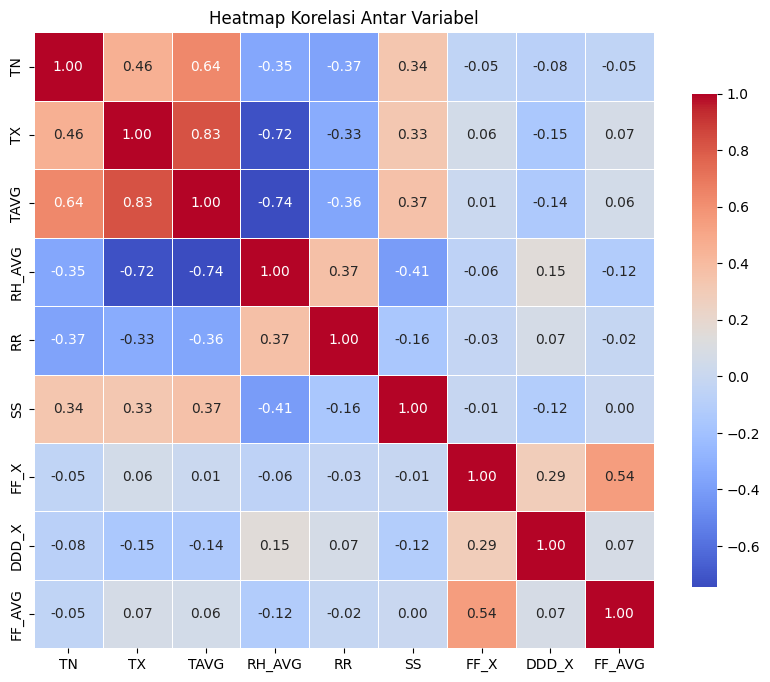

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# === 12. Pilih hanya kolom numerik dan hitung korelasi ===
data_2024_numeric = data_2024.select_dtypes(include=[np.number])
data_januari_2025_numeric = data_januari_2025.select_dtypes(include=[np.number])

# Hitung korelasi antar variabel numerik
correlation_matrix_2024 = data_2024_numeric.corr()
correlation_matrix_januari_2025 = data_januari_2025_numeric.corr()

# === 13. Visualisasikan Heatmap Korelasi untuk Data Latih (2024) ===
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_2024, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


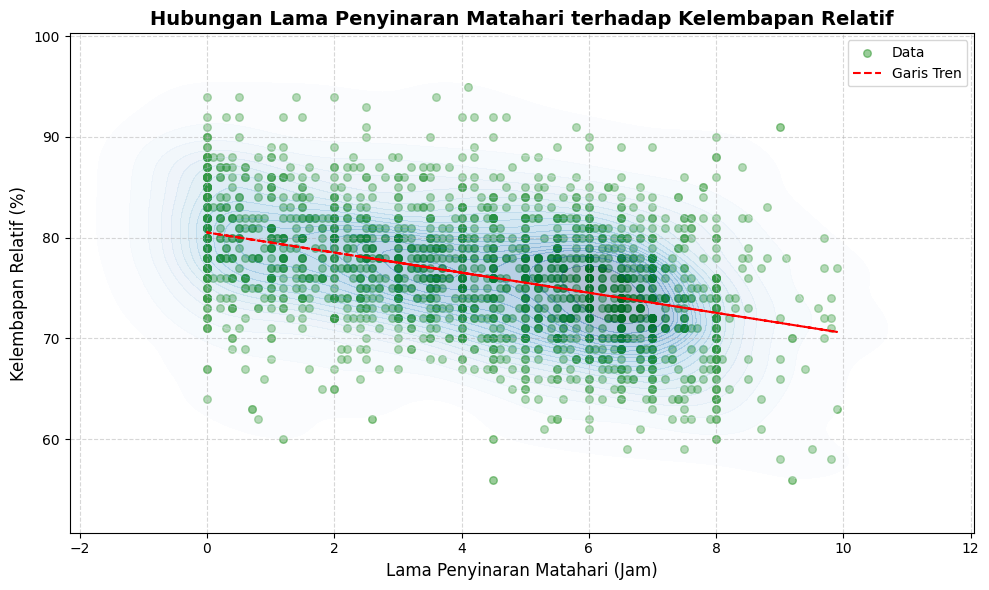

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot dengan transparansi dan garis tren
plt.figure(figsize=(10, 6))

# Plot scatter dengan transparansi
plt.scatter(data_2024['SS'], data_2024['RH_AVG'], alpha=0.4, color='green', label='Data', s=30)

# Garis tren
z = np.polyfit(data_2024['SS'], data_2024['RH_AVG'], 1)  # Linear fit
p = np.poly1d(z)
plt.plot(data_2024['SS'], p(data_2024['SS']), color='red', linestyle='--', label=f"Garis Tren")

# Tambahkan KDE plot sebagai background density
sns.kdeplot(x=data_2024['SS'], y=data_2024['RH_AVG'], cmap="Blues", fill=True, alpha=0.3, levels=20, thresh=0.01)

# Label dan judul
plt.xlabel('Lama Penyinaran Matahari (Jam)', fontsize=12)
plt.ylabel('Kelembapan Relatif (%)', fontsize=12)
plt.title('Hubungan Lama Penyinaran Matahari terhadap Kelembapan Relatif', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


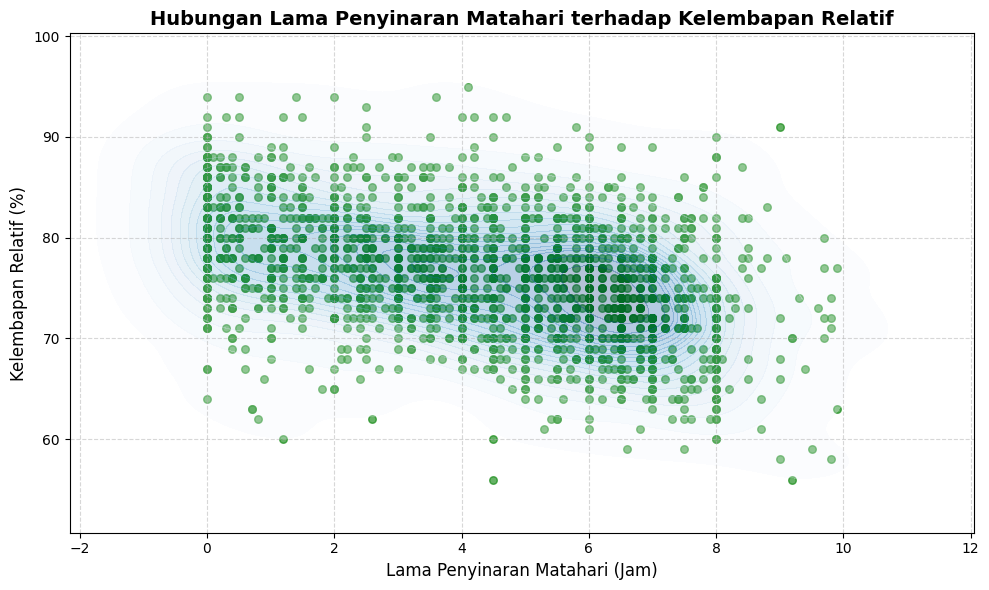

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat scatter plot dengan transparansi
plt.figure(figsize=(10, 6))
plt.scatter(data_2024['SS'], data_2024['RH_AVG'], alpha=0.6, color='green', s=30, label='Data')

# Tambahkan heatmap density untuk distribusi
sns.kdeplot(
    x=data_2024['SS'],
    y=data_2024['RH_AVG'],
    cmap="Blues",
    fill=True,
    alpha=0.3,
    levels=20,
    thresh=0.01
)

# Label dan judul
plt.xlabel('Lama Penyinaran Matahari (Jam)', fontsize=12)
plt.ylabel('Kelembapan Relatif (%)', fontsize=12)
plt.title('Hubungan Lama Penyinaran Matahari terhadap Kelembapan Relatif', fontsize=14, fontweight='bold')

# Tambahkan grid
plt.grid(True, linestyle='--', alpha=0.5)

# Menampilkan plot
plt.tight_layout()
plt.show()


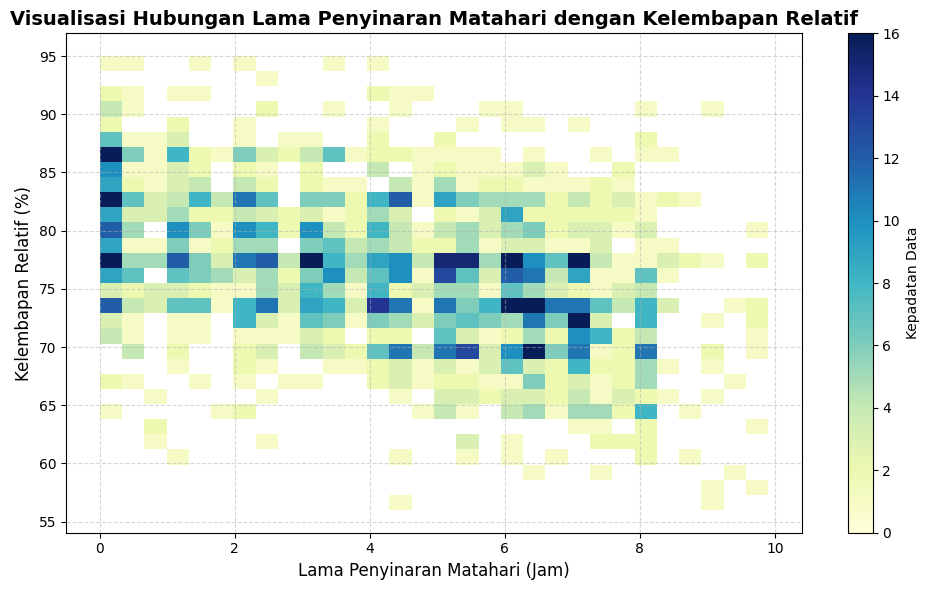

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat plot
plt.figure(figsize=(10, 6))

# Heatmap untuk menunjukkan kepadatan data
sns.histplot(
    x=data_2024['SS'],
    y=data_2024['RH_AVG'],
    bins=30,
    pmax=0.9,
    cmap='YlGnBu',
    cbar=True,
    cbar_kws={'label': 'Kepadatan Data'}
)

# Menambahkan label dan judul
plt.xlabel('Lama Penyinaran Matahari (Jam)', fontsize=12)
plt.ylabel('Kelembapan Relatif (%)', fontsize=12)
plt.title('Visualisasi Hubungan Lama Penyinaran Matahari dengan Kelembapan Relatif', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

# Menampilkan plot
plt.tight_layout()
plt.show()


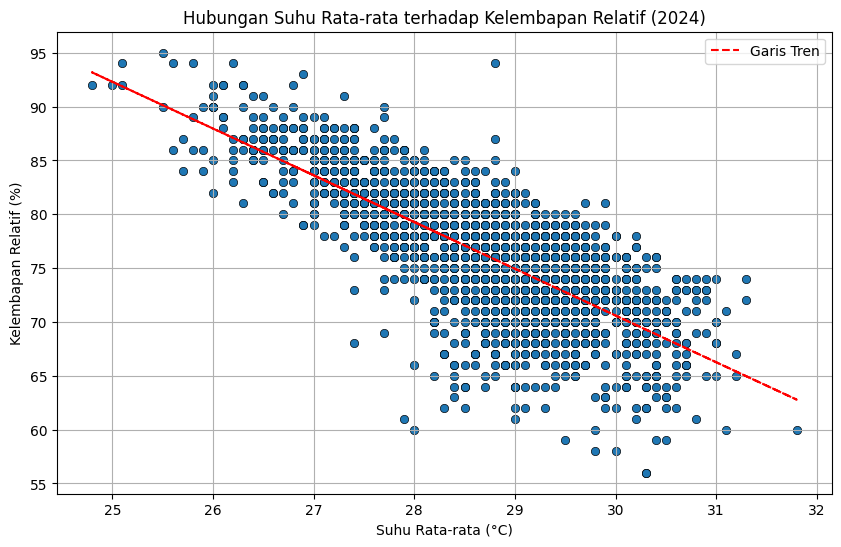

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot hubungan suhu rata-rata (TAVG) terhadap kelembapan relatif (RH_AVG)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_2024['TAVG'], y=data_2024['RH_AVG'], edgecolor='k')

# Tambahkan garis tren
z = np.polyfit(data_2024['TAVG'], data_2024['RH_AVG'], 1)
p = np.poly1d(z)
plt.plot(data_2024['TAVG'], p(data_2024['TAVG']), color='red', linestyle='dashed', label='Garis Tren')

plt.xlabel('Suhu Rata-rata (°C)')
plt.ylabel('Kelembapan Relatif (%)')
plt.title('Hubungan Suhu Rata-rata terhadap Kelembapan Relatif (2024)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE plot hubungan SS terhadap kelembapan relatif
plt.figure(figsize=(10, 6))

# Pass 'SS' and 'RH_AVG' as keyword arguments 'x' and 'y'
sns.kdeplot(
    x=data_2024['SS'],
    y=data_2024['RH_AVG'],
    cmap="Blues",
    fill=True,
    levels=30,  # Menambah jumlah kontur untuk lebih detail
    thresh=0.01,  # Menyesuaikan batas minimum kepadatan
)

plt.xlabel('Lama Penyinaran Matahari (Jam)', fontsize=12)
plt.ylabel('Kelembapan Relatif (%)', fontsize=12)
plt.title('KDE Plot Hubungan Lama Penyinaran Matahari dengan Kelembapan Relatif', fontsize=14, fontweight='bold')

plt.colorbar()  # Menampilkan skala warna
plt.tight_layout()
plt.show()


NameError: name 'data_2024' is not defined

<Figure size 1000x600 with 0 Axes>

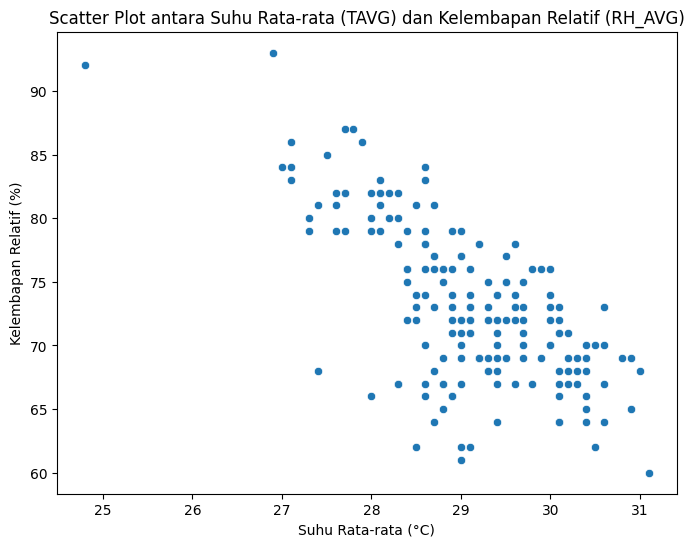

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# === 11. Scatter Plot antara TAVG (Suhu Rata-rata) dan RH_AVG (Kelembapan Relatif) ===
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_6_bulan, x='TAVG', y='RH_AVG')
plt.title('Scatter Plot antara Suhu Rata-rata (TAVG) dan Kelembapan Relatif (RH_AVG)')
plt.xlabel('Suhu Rata-rata (°C)')
plt.ylabel('Kelembapan Relatif (%)')
plt.show()


<ipython-input-59-3dd21c22c5b9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette=colors)


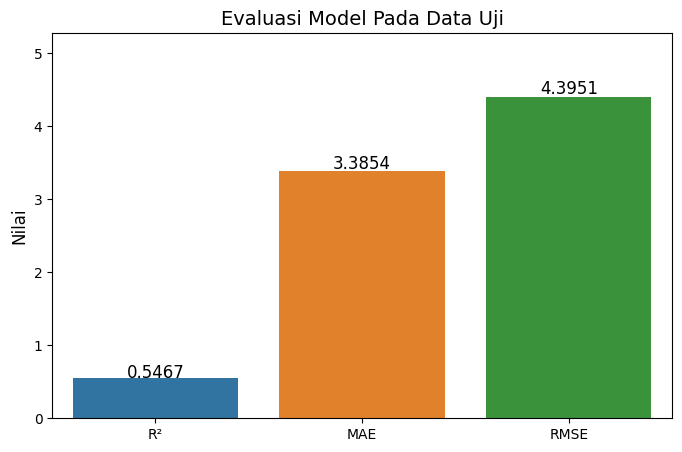

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data evaluasi untuk data uji
metrics = ['R²', 'MAE', 'RMSE']
values = [r2_test, mae_test, rmse_test]

# Membuat warna untuk setiap metrik
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Membuat plot
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette=colors)

# Menambahkan label pada setiap bar
for i, v in enumerate(values):
    plt.text(i, v + 0.01 * np.abs(v), f'{v:.4f}', ha='center', fontsize=12)

# Judul dan label
plt.title('Evaluasi Model Pada Data Uji', fontsize=14)
plt.ylabel('Nilai', fontsize=12)
plt.ylim(0, max(values) * 1.2)  # Memberikan ruang di atas bar

# Menampilkan plot
plt.show()


In [ ]:
# Tentukan rentang nilai k yang ingin dicoba
k_values = range(1, 6) # Mencoba nilai k dari 1 hingga 20
results = []

# Loop untuk setiap nilai k
for k in k_values:
    # Buat model KNN dengan k saat ini
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Prediksi data uji
    y_pred_test = knn.predict(X_test)

    # Hitung error
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_test)

    # Simpan hasil evaluasi untuk k saat ini
    results.append({
        'k': k,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })

# Konversi hasil menjadi DataFrame untuk analisis lebih lanjut
results_df = pd.DataFrame(results)

# Cari k dengan RMSE terendah (atau metrik lain sesuai kebutuhan)
best_k = results_df.loc[results_df['RMSE'].idxmin(), 'k']

print("\nHasil evaluasi untuk berbagai nilai k:")
print(results_df)

print(f"\nNilai k terbaik berdasarkan RMSE terendah: {best_k}")



Hasil evaluasi untuk berbagai nilai k:
   k       MAE      RMSE        R2
0  1  4.658537  6.099225  0.127057
1  2  3.879404  5.022780  0.407996
2  3  3.570009  4.625447  0.497954
3  4  3.406504  4.447069  0.535929
4  5  3.385366  4.395070  0.546719

Nilai k terbaik berdasarkan RMSE terendah: 5


Matriks Korelasi:
              SS    RH_AVG      TAVG
SS      1.000000 -0.407532  0.366181
RH_AVG -0.407532  1.000000 -0.743919
TAVG    0.366181 -0.743919  1.000000


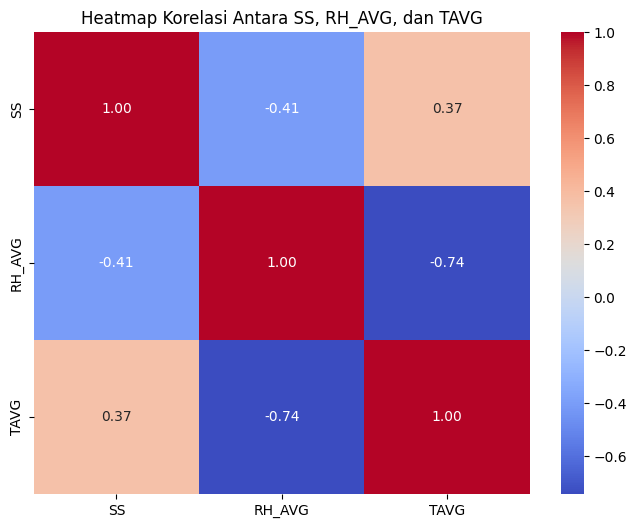

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# === 1. Baca data Desember 2024 (data latih) ===
file_path_desember_2024 = '/content/df2_2020-2024.xlsx'  # Ganti dengan path file data Desember 2024
data_desember_2024 = pd.read_excel(file_path_desember_2024)

# Memilih kolom yang relevan
selected_columns = ['SS', 'RH_AVG', 'TAVG']
data_selected = data_desember_2024[selected_columns]

# Menghitung matriks korelasi
correlation_matrix = data_selected.corr()

# Menampilkan matriks korelasi
print("Matriks Korelasi:")
print(correlation_matrix)

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Heatmap Korelasi Antara SS, RH_AVG, dan TAVG")
plt.show()


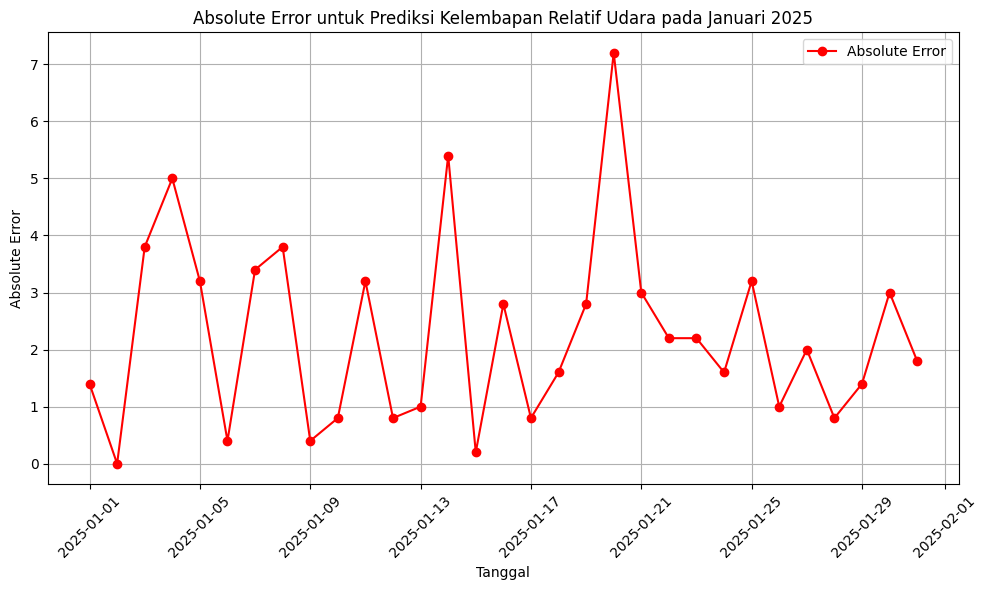

In [ ]:
import matplotlib.pyplot as plt

# Filter data sampai tanggal 31 Januari 2025
data_januari_2025_filtered = data_januari_2025[data_januari_2025['TANGGAL'] <= '2025-01-31']

# Visualisasi absolute error
plt.figure(figsize=(10, 6))
plt.plot(data_januari_2025_filtered['TANGGAL'], data_januari_2025_filtered['Absolute_Error'], label='Absolute Error', color='red', marker='o')
plt.title('Absolute Error untuk Prediksi Kelembapan Relatif Udara pada Januari 2025')
plt.xlabel('Tanggal')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Agar tanggal tidak tumpang tindih
plt.tight_layout()  # Agar layout lebih rapi
plt.show()


In [ ]:
# Tambahkan kolom untuk hari (tanggal saja)
data_6_bulan['HARI'] = data_6_bulan['TANGGAL'].dt.day

# Rata-rata per tanggal (1-31) tanpa mempertimbangkan bulan, hanya untuk kolom numerik
data_latih_avg_hari = data_6_bulan.groupby('HARI').mean(numeric_only=True).reset_index()

# Menampilkan rata-rata per hari
print(data_latih_avg_hari)

    HARI         TN         TX       TAVG     RH_AVG         RR        SS  \
0      1  26.800000  33.833333  29.600000  72.000000   6.833333  6.300000   
1      2  26.300000  33.466667  29.333333  75.166667   6.266667  4.583333   
2      3  26.300000  32.833333  28.550000  76.000000  11.666667  4.666667   
3      4  26.133333  32.766667  28.600000  76.166667   8.083333  4.466667   
4      5  25.766667  32.600000  28.583333  76.000000   8.916667  4.900000   
5      6  25.966667  32.166667  28.450000  76.500000  17.050000  4.750000   
6      7  25.633333  33.266667  29.066667  73.500000  14.883333  3.950000   
7      8  26.720000  33.766667  29.566667  70.500000  11.666667  5.566667   
8      9  26.600000  33.200000  28.866667  76.166667  15.666667  5.233333   
9     10  25.733333  32.966667  28.916667  76.000000  12.333333  5.650000   
10    11  26.600000  33.633333  29.433333  72.000000   6.833333  4.266667   
11    12  26.300000  33.333333  29.216667  70.333333   6.500000  4.916667   

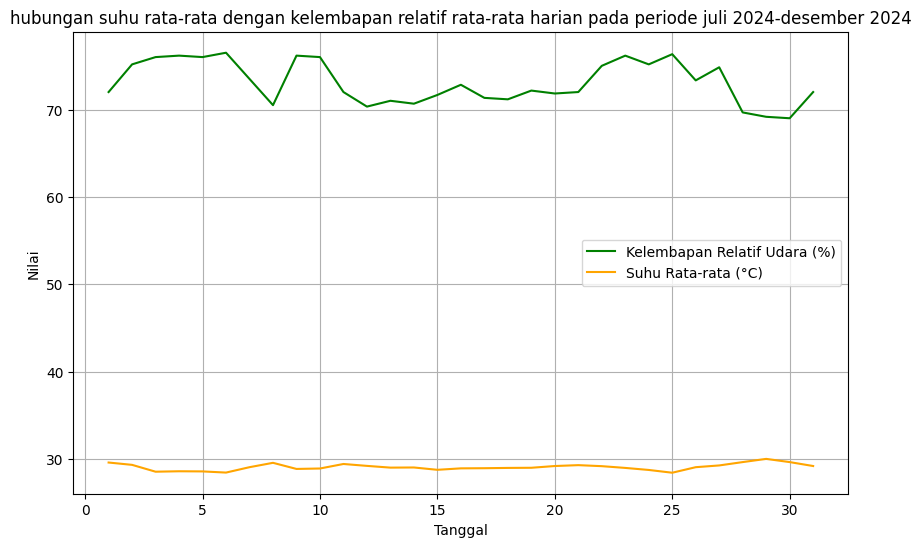

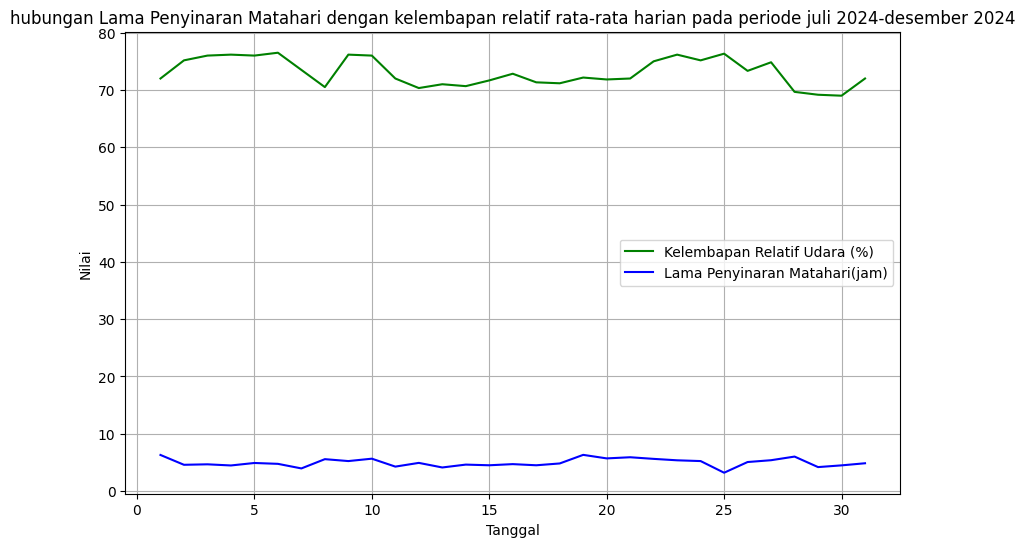

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hubungan kelembapan dan suhu berdasarkan tanggal
plt.figure(figsize=(10, 6))
plt.plot(data_latih_avg_hari['HARI'], data_latih_avg_hari['RH_AVG'], label='Kelembapan Relatif Udara (%)', color='green')
plt.plot(data_latih_avg_hari['HARI'], data_latih_avg_hari['TAVG'], label='Suhu Rata-rata (°C)', color='orange')
plt.title('hubungan suhu rata-rata dengan kelembapan relatif rata-rata harian pada periode juli 2024-desember 2024')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi hubungan kelembapan dan lama penyinaran matahari berdasarkan tanggal
plt.figure(figsize=(10, 6))
plt.plot(data_latih_avg_hari['HARI'], data_latih_avg_hari['RH_AVG'], label='Kelembapan Relatif Udara (%)', color='green')
plt.plot(data_latih_avg_hari['HARI'], data_latih_avg_hari['SS'], label='Lama Penyinaran Matahari(jam)', color='blue')
plt.title('hubungan Lama Penyinaran Matahari dengan kelembapan relatif rata-rata harian pada periode juli 2024-desember 2024')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

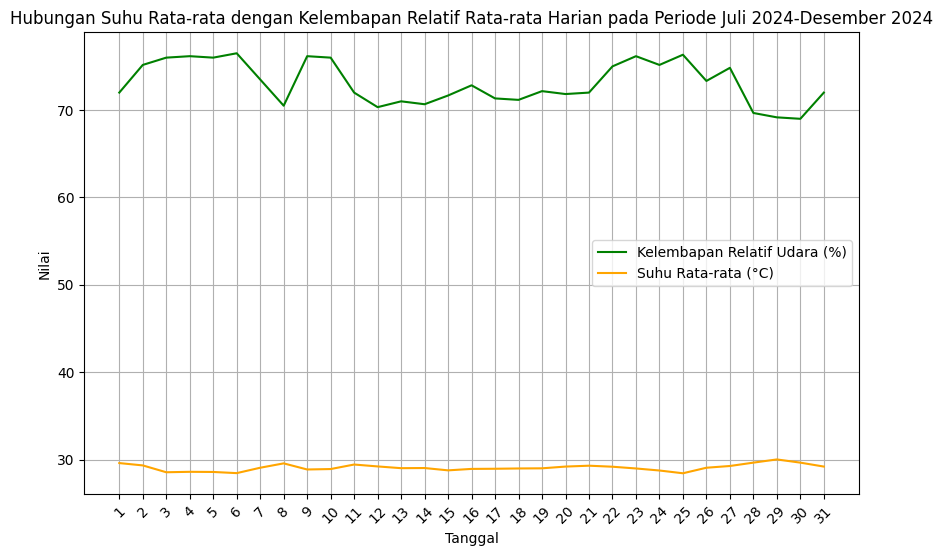

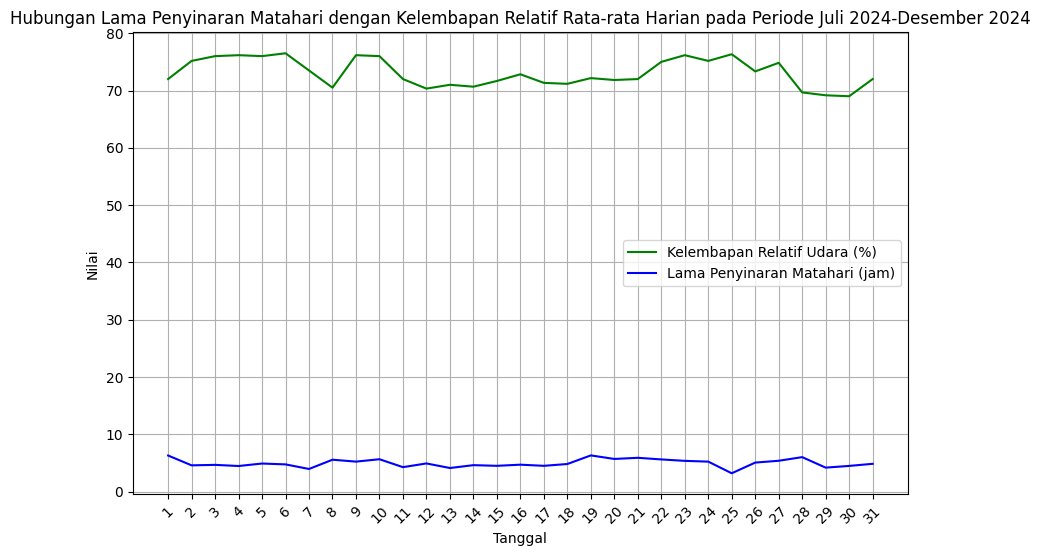

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hubungan kelembapan dan suhu berdasarkan tanggal
plt.figure(figsize=(10, 6))
plt.plot(data_latih_avg_hari['HARI'], data_latih_avg_hari['RH_AVG'], label='Kelembapan Relatif Udara (%)', color='green')
plt.plot(data_latih_avg_hari['HARI'], data_latih_avg_hari['TAVG'], label='Suhu Rata-rata (°C)', color='orange')
plt.title('Hubungan Suhu Rata-rata dengan Kelembapan Relatif Rata-rata Harian pada Periode Juli 2024-Desember 2024')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)

# Menampilkan tanggal sesuai dengan data, misalnya angka 1, 2, 3,..., 30
plt.xticks(data_latih_avg_hari['HARI'], rotation=45)  # Menampilkan semua angka tanggal sesuai data
plt.show()

# Visualisasi hubungan kelembapan dan lama penyinaran matahari berdasarkan tanggal
plt.figure(figsize=(10, 6))
plt.plot(data_latih_avg_hari['HARI'], data_latih_avg_hari['RH_AVG'], label='Kelembapan Relatif Udara (%)', color='green')
plt.plot(data_latih_avg_hari['HARI'], data_latih_avg_hari['SS'], label='Lama Penyinaran Matahari (jam)', color='blue')
plt.title('Hubungan Lama Penyinaran Matahari dengan Kelembapan Relatif Rata-rata Harian pada Periode Juli 2024-Desember 2024')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)

# Menampilkan tanggal sesuai dengan data, misalnya angka 1, 2, 3,..., 30
plt.xticks(data_latih_avg_hari['HARI'], rotation=45)  # Menampilkan semua angka tanggal sesuai data
plt.show()


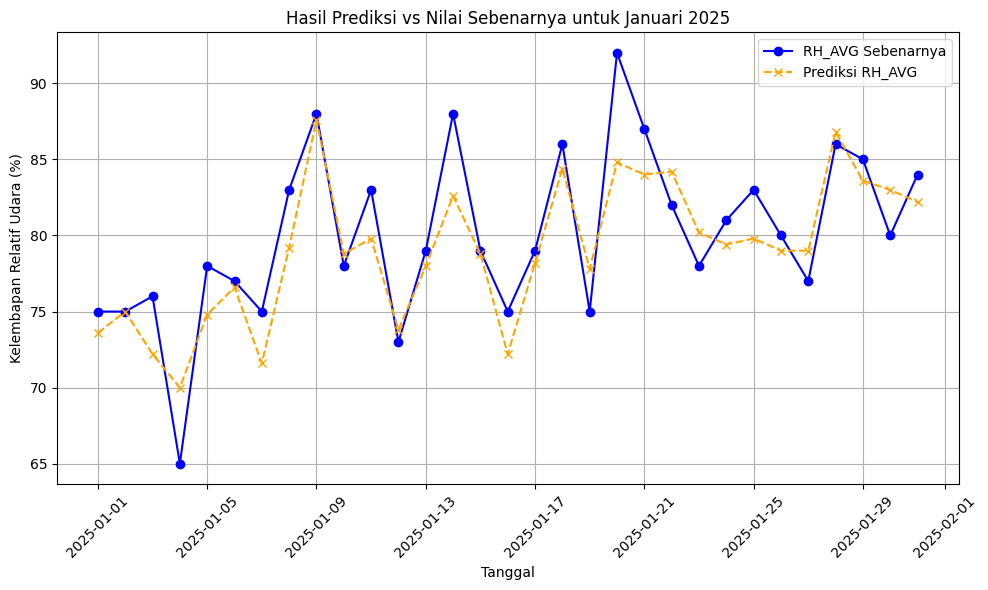

In [ ]:
import matplotlib.pyplot as plt

# Filter data sampai tanggal 31 Januari 2025
data_januari_2025_filtered = data_januari_2025[data_januari_2025['TANGGAL'] <= '2025-01-31']

# Visualisasi hasil prediksi vs nilai sebenarnya
plt.figure(figsize=(10, 6))
plt.plot(data_januari_2025_filtered['TANGGAL'], data_januari_2025_filtered['RH_AVG'], label='RH_AVG Sebenarnya', color='blue', marker='o')
plt.plot(data_januari_2025_filtered['TANGGAL'], data_januari_2025_filtered['Prediksi_RH_AVG'], label='Prediksi RH_AVG', color='orange', linestyle='--', marker='x')
plt.title('Hasil Prediksi vs Nilai Sebenarnya untuk Januari 2025')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan Relatif Udara (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Agar tanggal tidak tumpang tindih
plt.tight_layout()  # Agar layout lebih rapi
plt.show()


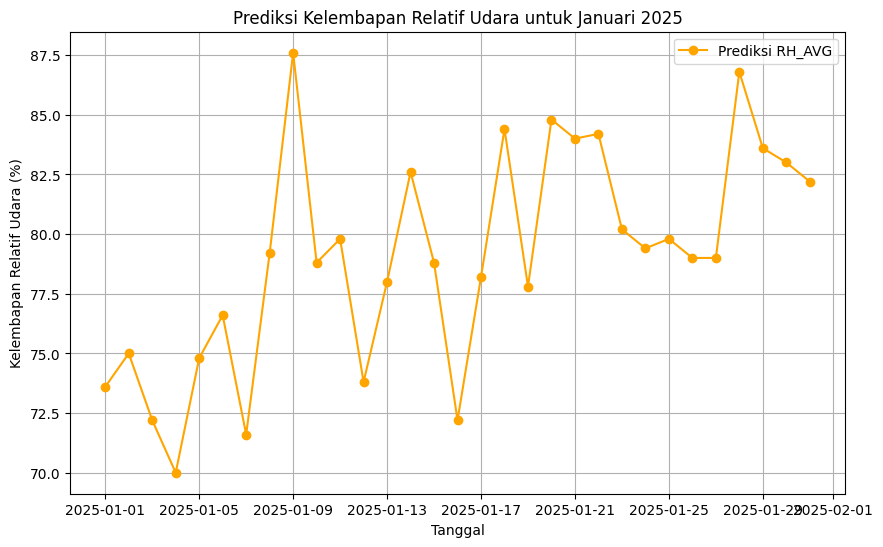

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi prediksi kelembapan relatif udara
plt.figure(figsize=(10, 6))
plt.plot(data_januari_2025['TANGGAL'], data_januari_2025['Prediksi_RH_AVG'], label='Prediksi RH_AVG', color='orange', marker='o')
plt.title('Prediksi Kelembapan Relatif Udara untuk Januari 2025')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan Relatif Udara (%)')
plt.legend()
plt.grid(True)
plt.show()


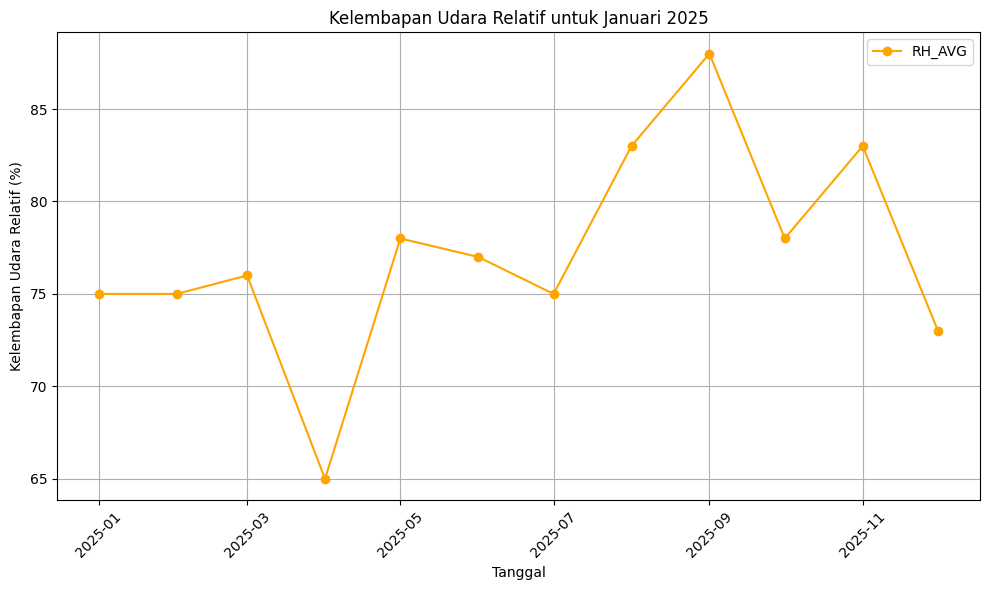

In [ ]:
# Konversi kolom TANGGAL menjadi datetime
import pandas as pd
data_januari_2025['TANGGAL'] = pd.to_datetime(data_januari_2025['TANGGAL'])
import matplotlib.pyplot as plt # Import matplotlib.pyplot for plotting

# Visualisasi prediksi kelembapan relatif udara
plt.figure(figsize=(10, 6))
plt.plot(
    data_januari_2025['TANGGAL'],
    data_januari_2025['RH_AVG'],
    label='RH_AVG',
    color='orange',
    marker='o'
)
plt.title('Kelembapan Udara Relatif untuk Januari 2025')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan Udara Relatif (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Untuk memutar label tanggal agar lebih mudah dibaca
plt.tight_layout()  # Agar layout tidak terpotong
plt.show()

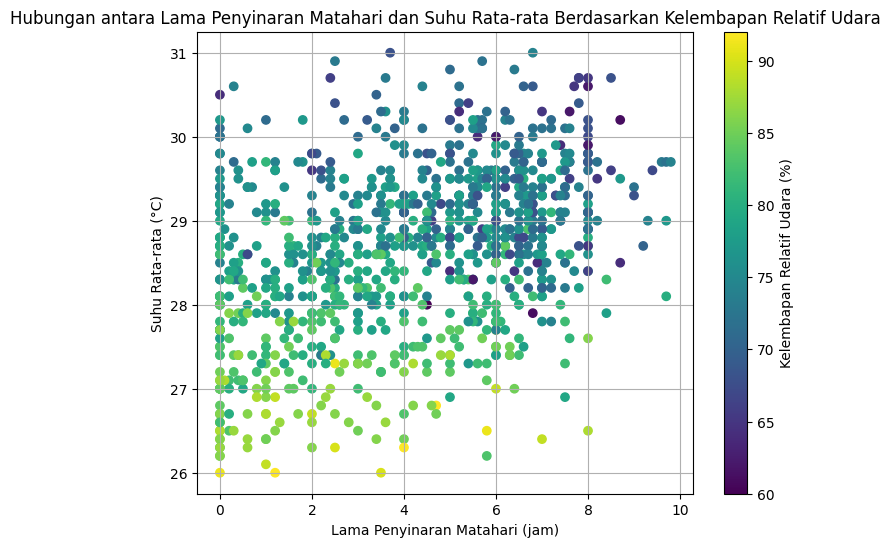

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi hubungan antara suhu rata-rata (TAVG) dan kelembapan relatif udara (RH_AVG) berdasarkan lama penyinaran matahari (SS)
plt.figure(figsize=(8, 6))
plt.scatter(data_2024['SS'], data_2024['TAVG'], c=data_2024['RH_AVG'], cmap='viridis')
plt.xlabel('Lama Penyinaran Matahari (jam)')
plt.ylabel('Suhu Rata-rata (°C)')
plt.title('Hubungan antara Lama Penyinaran Matahari dan Suhu Rata-rata Berdasarkan Kelembapan Relatif Udara')
plt.colorbar(label='Kelembapan Relatif Udara (%)')
plt.grid(True)
plt.show()


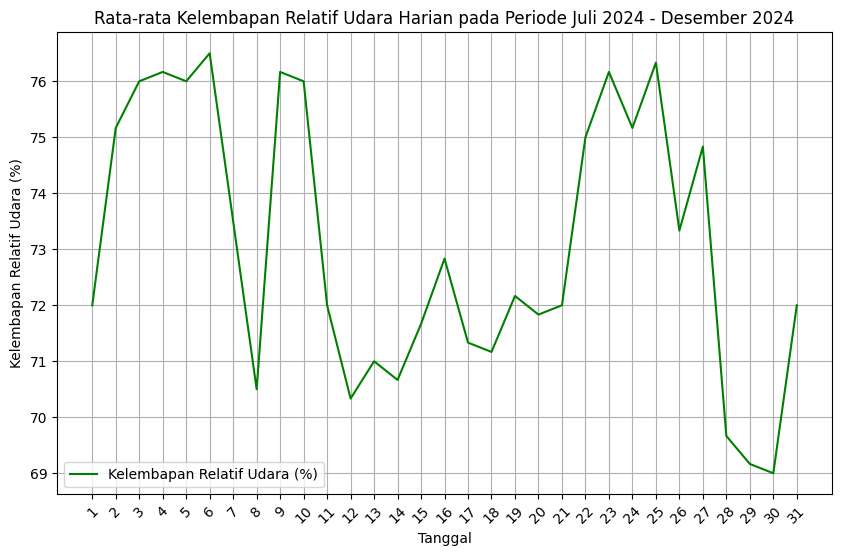

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi rata-rata kelembapan relatif udara berdasarkan hari
plt.figure(figsize=(10, 6))
plt.plot(data_latih_avg_hari['HARI'], data_latih_avg_hari['RH_AVG'], label='Kelembapan Relatif Udara (%)', color='green')
plt.title('Rata-rata Kelembapan Relatif Udara Harian pada Periode Juli 2024 - Desember 2024')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan Relatif Udara (%)')
plt.legend()
plt.grid(True)

# Menampilkan tanggal sesuai dengan data, misalnya angka 1, 2, 3,..., 30
plt.xticks(data_latih_avg_hari['HARI'], rotation=45)  # Menampilkan semua angka tanggal sesuai data

plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Menyusun parameter grid untuk n_neighbors
param_grid = {'n_neighbors': range(1, 20)}

# Mencoba GridSearch untuk mencari n_neighbors terbaik
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Menampilkan n_neighbors terbaik
print(f'Optimal n_neighbors: {grid_search.best_params_["n_neighbors"]}')


Optimal n_neighbors: 8


In [ ]:
# === 11. Hitung Feature Importance dengan Permutation ===
from sklearn.inspection import permutation_importance # Import the permutation_importance function

result = permutation_importance(knn, X_januari_2025_scaled, data_januari_2025['RH_AVG'], n_repeats=10, random_state=42)

# Mendapatkan hasil importance untuk setiap fitur
importance = result.importances_mean

# Tampilkan hasil feature importance
for feature, imp in zip(X_januari_2025.columns, importance):
    print(f"Fitur: {feature}, Feature Importance: {imp:.4f}")

Fitur: TAVG, Feature Importance: 1.3070
Fitur: SS, Feature Importance: 0.0321


In [ ]:
from sklearn.metrics import mean_squared_log_error

# Menghitung RMSLE untuk data latih dan data uji
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_pred_train))  # Pastikan y_pred_train ada
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred_test))  # Pastikan y_pred_test ada

# Menampilkan hasil RMSLE
print(f'RMSLE untuk Data Latih: {rmsle_train:.4f}')
print(f'RMSLE untuk Data Uji: {rmsle_test:.4f}')


RMSLE untuk Data Latih: 0.0536
RMSLE untuk Data Uji: 0.0653


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select only numeric columns for correlation calculation
numeric_columns = data_desember_2024.select_dtypes(include=np.number).columns

# Menghitung korelasi antar fitur
correlation_matrix = data_desember_2024[numeric_columns].corr()

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.tight_layout()
plt.show()

NameError: name 'data_desember_2024' is not defined

karena korelasi antara ss dengan rr nilainya lebih kecil dari pada interaksi ss dengan tavg dan rh_avg maka rr saya hapus

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Pilih fitur-fitur numerik (kecuali target dan fitur non-numerik)
X = data_desember_2024[['TAVG', 'SS']]  # Ganti dengan fitur yang relevan dalam dataset Anda

# Menambahkan konstanta untuk menghitung VIF
X_with_const = add_constant(X)

# Menghitung VIF untuk setiap fitur
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Menampilkan hasil VIF
print(vif_data)


  Feature         VIF
0   const  994.469644
1    TAVG    1.124731
2      SS    1.124731


karena nilai vif dari kedua variabel prediktor tersebut tidak ada yang lebih dari 10, maka tidak ada variabel yang dihapus

### MODEL

### **Penerapan Metode K-Nearest Neighbors (KNN) untuk Prediksi Lama Penyinaran Matahari Berdasarkan Suhu Udara Rata-Rata dan Kelembapan Relatif Udara**

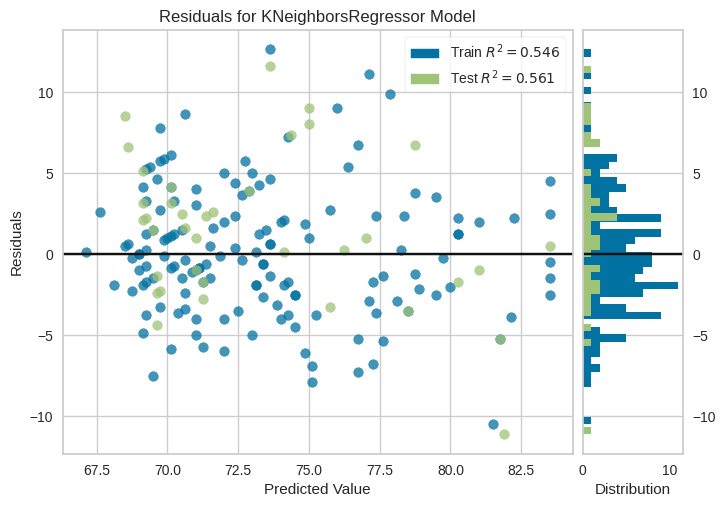

<Axes: title={'center': 'Residuals for KNeighborsRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
# Import library yang dibutuhkan
from yellowbrick.regressor import ResidualsPlot
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Model KNN
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)

# Residual Plot menggunakan Yellowbrick
visualizer = ResidualsPlot(knn)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
# Tampilkan plot
visualizer.poof()



In [ ]:
# === 15. Menyimpan hasil standarisasi dan prediksi ===

# Menyimpan hasil standarisasi data latih (Desember 2024)
data_desember_2024_scaled = pd.DataFrame(X_scaled, columns=['TAVG_scaled', 'SS_scaled'])
data_desember_2024['TAVG_scaled'] = data_desember_2024_scaled['TAVG_scaled']
data_desember_2024['SS_scaled'] = data_desember_2024_scaled['SS_scaled']

# Menyimpan hasil standarisasi untuk data Januari 2025
data_januari_2025_scaled = pd.DataFrame(X_januari_2025_scaled, columns=['TAVG_scaled', 'SS_scaled'])
data_januari_2025['TAVG_scaled'] = data_januari_2025_scaled['TAVG_scaled']
data_januari_2025['SS_scaled'] = data_januari_2025_scaled['SS_scaled']

# Menyimpan data prediksi dan hasil error untuk Januari 2025
data_januari_2025.to_excel('/content/hasil_prediksi_januari_2025.xlsx', index=False)

# Menyimpan data latih dan hasil standarisasi ke file Excel
data_desember_2024.to_excel('/content/hasil_data_latih_2024.xlsx', index=False)
data_januari_2025.to_excel('/content/hasil_data_januari_2025.xlsx', index=False)

# Menyimpan hasil standarisasi dan prediksi untuk Januari 2025
print("\nHasil dan Data Standarisasi Disimpan ke File Excel:")
print("Data Desember 2024 dan Standarisasi Disimpan di 'hasil_data_latih_2024.xlsx'")
print("Data Januari 2025 dan Standarisasi Disimpan di 'hasil_data_januari_2025.xlsx'")



Hasil dan Data Standarisasi Disimpan ke File Excel:
Data Desember 2024 dan Standarisasi Disimpan di 'hasil_data_latih_2024.xlsx'
Data Januari 2025 dan Standarisasi Disimpan di 'hasil_data_januari_2025.xlsx'


In [ ]:
# Import library yang dibutuhkan
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.dummy import DummyRegressor

# === 1. Baseline Model ===
# Gunakan DummyRegressor untuk baseline
dummy_model = DummyRegressor(strategy="mean")  # Baseline model menggunakan rata-rata dari target
dummy_model.fit(X_train, y_train)

# Prediksi dan evaluasi untuk baseline model
y_pred_dummy = dummy_model.predict(X_test)
mse_dummy = mean_squared_error(y_test, y_pred_dummy)
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)

print(f"Baseline Model MSE: {mse_dummy:.4f}")
print(f"Baseline Model MAE: {mae_dummy:.4f}")

# === 2. Cross-Validation untuk KNN ===
knn = KNeighborsRegressor(n_neighbors=8)

# Define cross-validation scoring functions
mse_scorer = make_scorer(mean_squared_error)
mae_scorer = make_scorer(mean_absolute_error)

# Cross-validation untuk MSE
mse_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring=mse_scorer)

print(f"Cross-validation MSE: {mse_scores.mean():.4f}")

# Cross-validation untuk MAE
mae_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring=mae_scorer)

print(f"Cross-validation MAE: {mae_scores.mean():.4f}")


Baseline Model MSE: 53.7756
Baseline Model MAE: 5.9860
Cross-validation MSE: 18.4155
Cross-validation MAE: 3.4379


#### **Visualisasi**

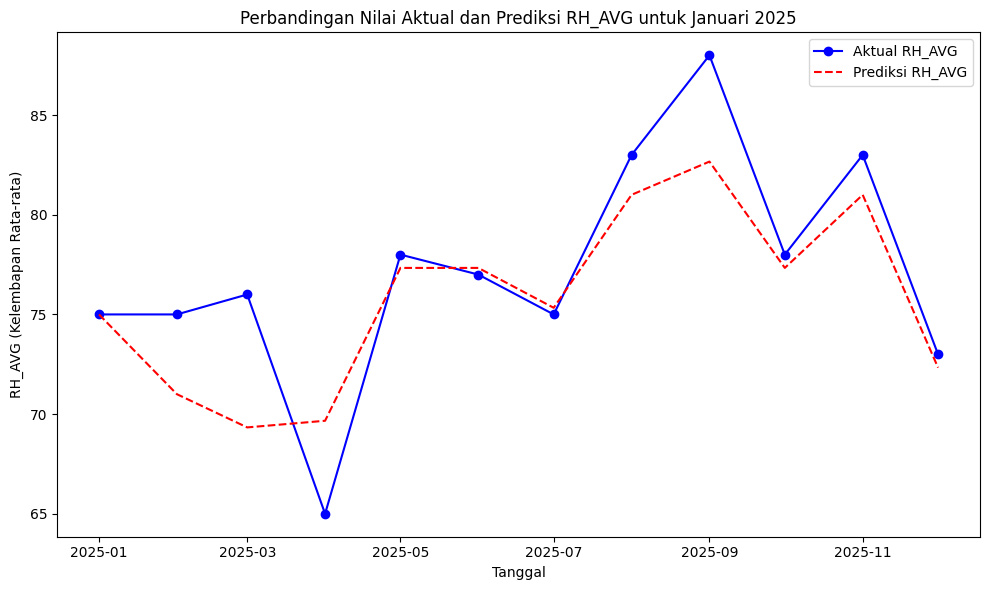

In [ ]:
import matplotlib.pyplot as plt

# Pastikan kolom TANGGAL sudah dalam format datetime
data_januari_2025['TANGGAL'] = pd.to_datetime(data_januari_2025['TANGGAL'])

# Visualisasi perbandingan nilai aktual dan prediksi RH_AVG
plt.figure(figsize=(10, 6))

# Plot nilai aktual RH_AVG
plt.plot(data_januari_2025['TANGGAL'], data_januari_2025['RH_AVG'], label='Aktual RH_AVG', color='blue', marker='o')

# Plot nilai prediksi RH_AVG
plt.plot(data_januari_2025['TANGGAL'], data_januari_2025['Prediksi_RH_AVG'], label='Prediksi RH_AVG', color='red', linestyle='--')

# Menambahkan label dan judul
plt.xlabel('Tanggal')
plt.ylabel('RH_AVG (Kelembapan Rata-rata)')
plt.title('Perbandingan Nilai Aktual dan Prediksi RH_AVG untuk Januari 2025')

# Menambahkan legenda
plt.legend()

# Menyesuaikan tata letak agar label tidak terpotong
plt.tight_layout()

# Tampilkan plot
plt.show()


Index(['TANGGAL', 'TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X',
       'FF_AVG', 'DDD_CAR', 'Prediksi_RH_AVG', 'Error', 'Absolute_Error'],
      dtype='object')


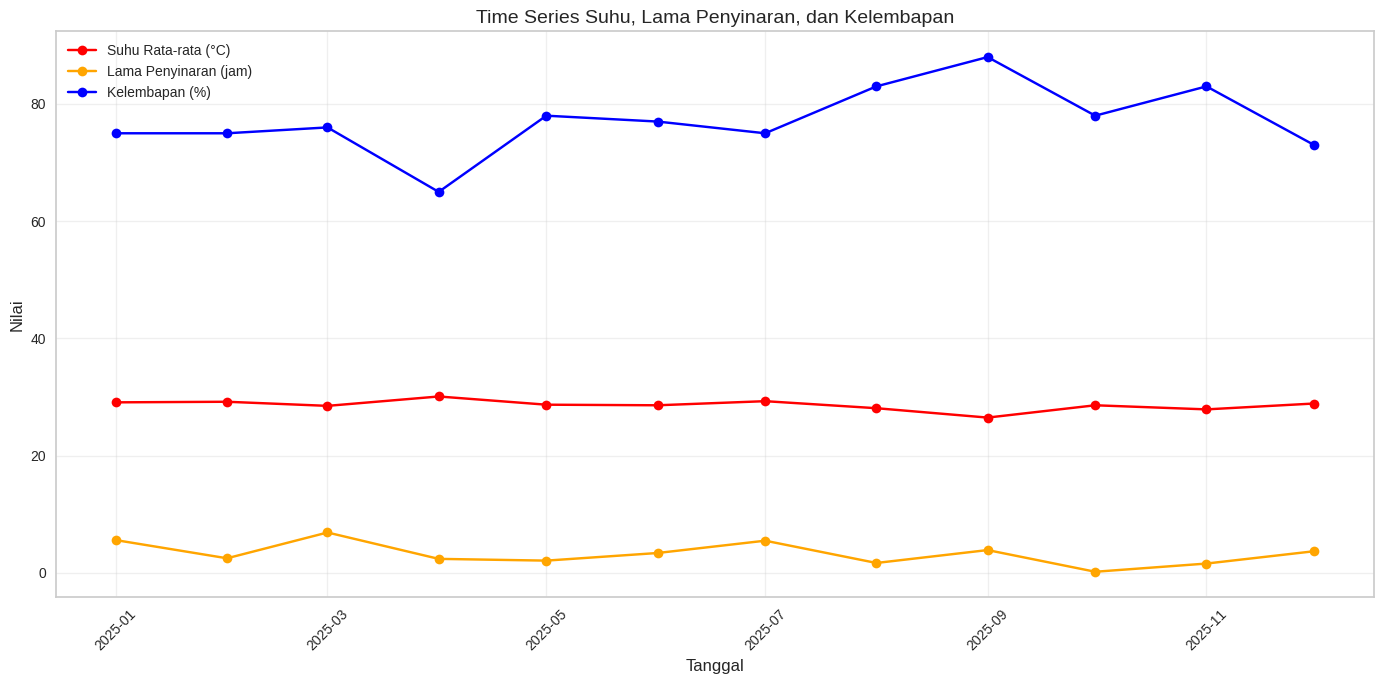

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Konversi kolom tanggal menjadi format datetime agar mudah diproses
data_januari_2025['TANGGAL'] = pd.to_datetime(data_januari_2025['TANGGAL'], format='%d')

# Print the column names to verify if 'LAMA_PENYINARAN' exists
print(data_januari_2025.columns)

# Plot time series
plt.figure(figsize=(14, 7))

# Plot suhu
plt.plot(data_januari_2025['TANGGAL'], data_januari_2025['TAVG'], marker='o', label='Suhu Rata-rata (°C)', color='red')

# Plot lama penyinaran matahari
plt.plot(data_januari_2025['TANGGAL'], data_januari_2025['SS'], marker='o', label='Lama Penyinaran (jam)', color='orange')

# Plot kelembapan
plt.plot(data_januari_2025['TANGGAL'], data_januari_2025['RH_AVG'], marker='o', label='Kelembapan (%)', color='blue')

# Tambahkan label, judul, dan legenda
plt.title('Time Series Suhu, Lama Penyinaran, dan Kelembapan', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()

# Tampilkan grafik
plt.show()

Index(['TANGGAL', 'TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X',
       'FF_AVG', 'DDD_CAR', 'Prediksi_RH_AVG', 'Error', 'Absolute_Error'],
      dtype='object')


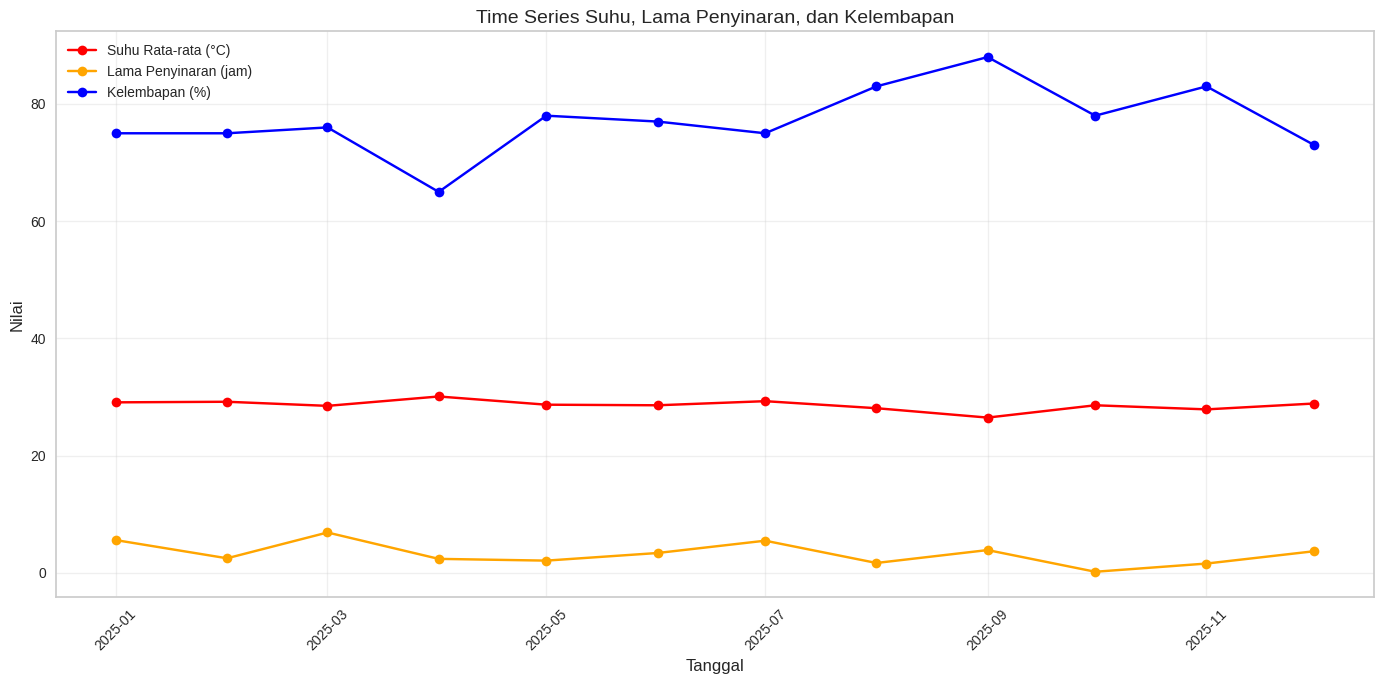

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Konversi kolom tanggal menjadi format datetime agar mudah diproses
data_januari_2025['TANGGAL'] = pd.to_datetime(data_januari_2025['TANGGAL'], format='%d')

# Print the column names to verify if 'LAMA_PENYINARAN' exists
print(data_januari_2025.columns)

# Plot time series
plt.figure(figsize=(14, 7))

# Plot suhu
plt.plot(data_januari_2025['TANGGAL'], data_januari_2025['TAVG'], marker='o', label='Suhu Rata-rata (°C)', color='red')

# Plot lama penyinaran matahari
plt.plot(data_januari_2025['TANGGAL'], data_januari_2025['SS'], marker='o', label='Lama Penyinaran (jam)', color='orange')

# Plot kelembapan
plt.plot(data_januari_2025['TANGGAL'], data_januari_2025['RH_AVG'], marker='o', label='Kelembapan (%)', color='blue')

# Tambahkan label, judul, dan legenda
plt.title('Time Series Suhu, Lama Penyinaran, dan Kelembapan', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()

# Tampilkan grafik
plt.show()


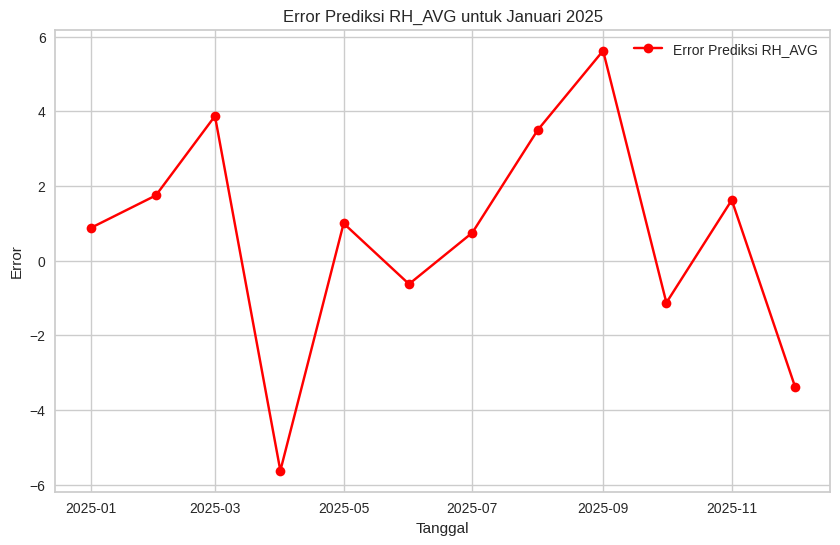

In [ ]:
# Visualisasi error prediksi untuk Januari 2025
plt.figure(figsize=(10, 6))
plt.plot(data_januari_2025['TANGGAL'], data_januari_2025['Error'], color='red', marker='o', label='Error Prediksi RH_AVG')
plt.title('Error Prediksi RH_AVG untuk Januari 2025')
plt.xlabel('Tanggal')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


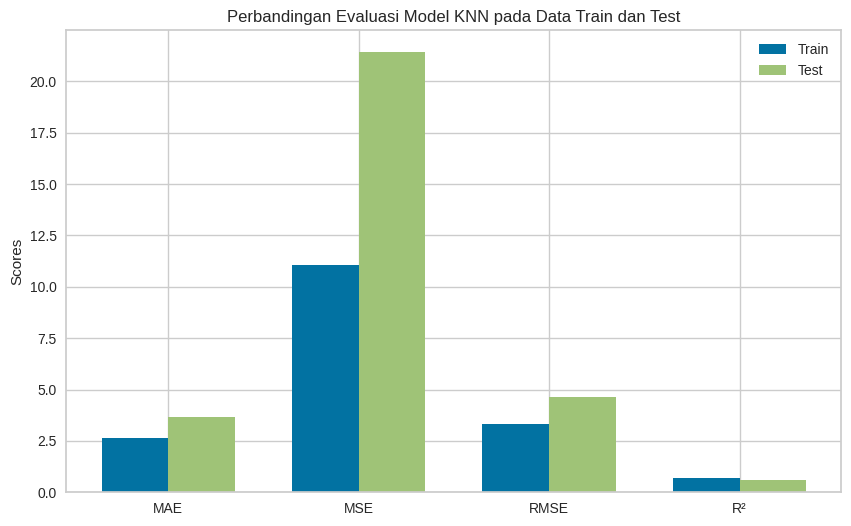

In [ ]:
# Bar plot perbandingan evaluasi model
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
train_scores = [mae_train, mse_train, rmse_train, r2_train]
test_scores = [mae_test, mse_test, rmse_test, r2_test]

x = np.arange(len(metrics))  # lokasi label
width = 0.35  # lebar bar

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

ax.set_ylabel('Scores')
ax.set_title('Perbandingan Evaluasi Model KNN pada Data Train dan Test')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


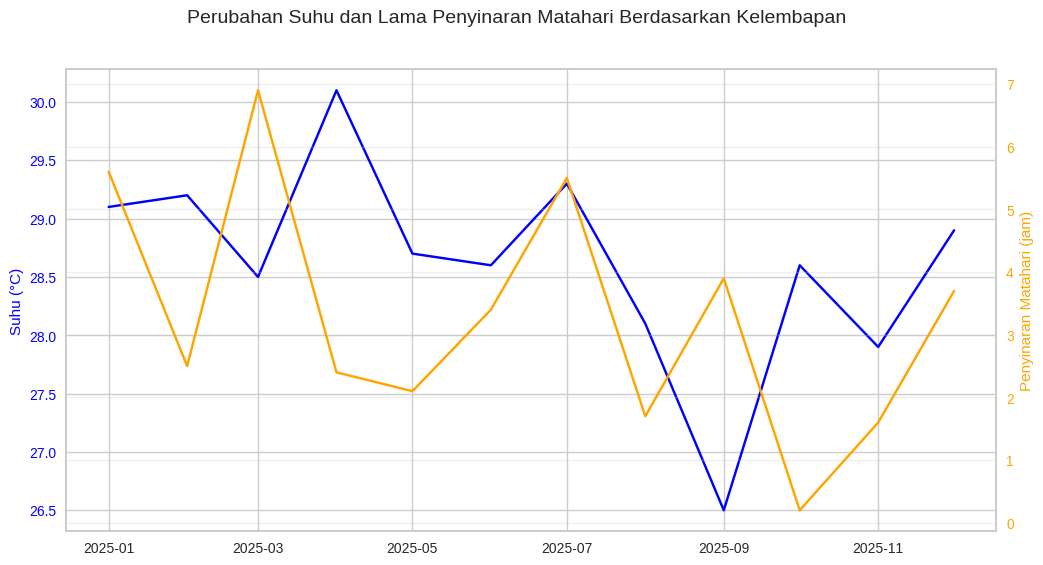

In [ ]:
# Plot suhu dan lama penyinaran matahari
fig, ax1 = plt.subplots(figsize=(12, 6))

# Garis untuk suhu
ax1.plot(data_januari_2025['TANGGAL'], data_januari_2025['TAVG'], color='blue', label='Suhu Rata-Rata (°C)')
ax1.set_ylabel('Suhu (°C)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Garis untuk lama penyinaran matahari
ax2 = ax1.twinx()
ax2.plot(data_januari_2025['TANGGAL'], data_januari_2025['SS'], color='orange', label='Penyinaran Matahari (jam)')
ax2.set_ylabel('Penyinaran Matahari (jam)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Tambahkan grid, legend, dan judul
fig.suptitle('Perubahan Suhu dan Lama Penyinaran Matahari Berdasarkan Kelembapan', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


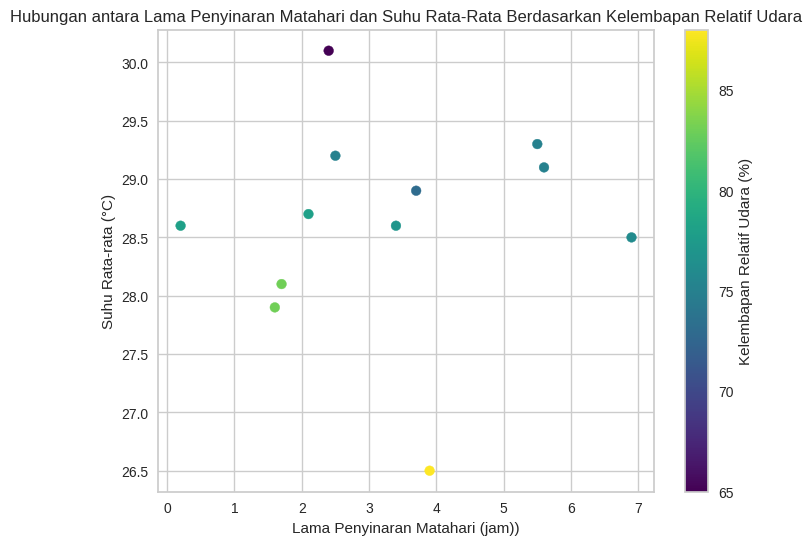

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi hubungan antara kelembapan relatif udara (RH_AVG) dan suhu udara rata-rata (TAVG)
plt.figure(figsize=(8, 6))
# Gunakan data_monthly_avg yang mengandung kolom 'SS' (lama penyinaran matahari)
plt.scatter(data_januari_2025['SS'], data_januari_2025['TAVG'], c=data_januari_2025['RH_AVG'], cmap='viridis')
plt.xlabel('Lama Penyinaran Matahari (jam))')
plt.ylabel('Suhu Rata-rata (°C)')
plt.title('Hubungan antara Lama Penyinaran Matahari dan Suhu Rata-Rata Berdasarkan Kelembapan Relatif Udara')
plt.colorbar(label='Kelembapan Relatif Udara (%)')
plt.show()

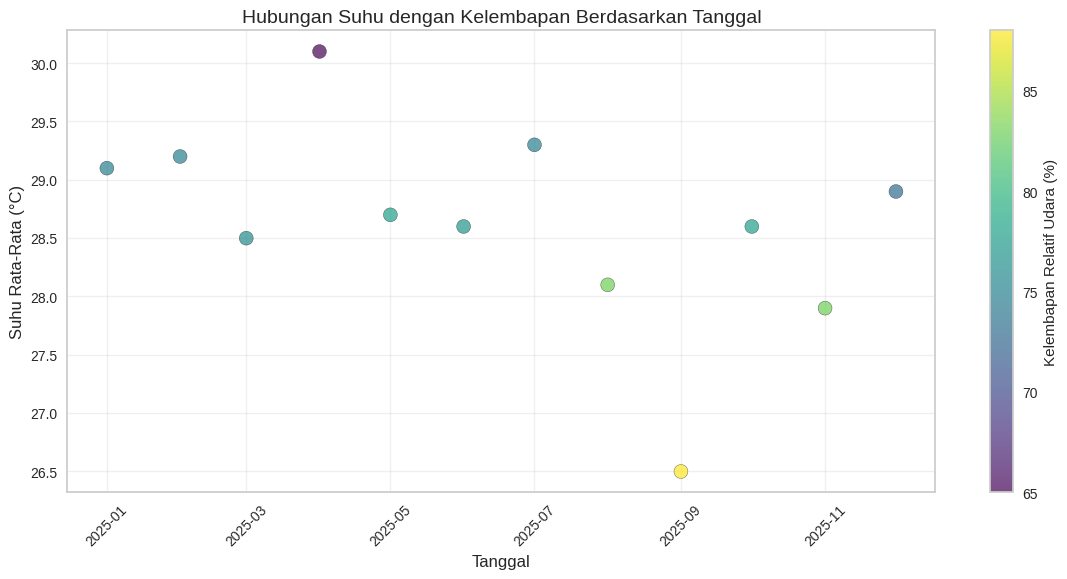

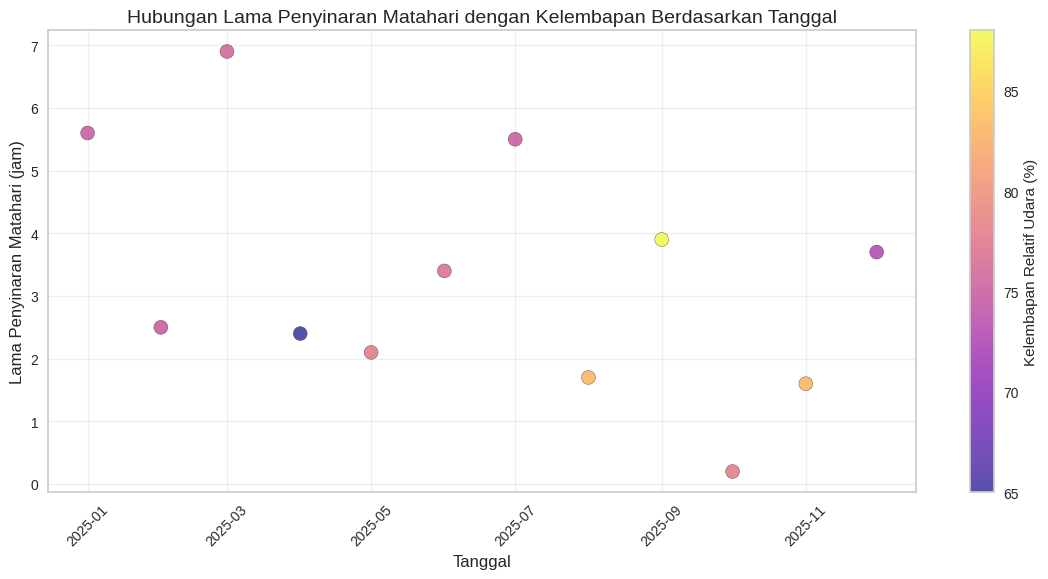

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot hubungan suhu dan kelembapan
plt.figure(figsize=(14, 6))
scatter1 = plt.scatter(data_januari_2025['TANGGAL'], data_januari_2025['TAVG'],
                        c=data_januari_2025['RH_AVG'], cmap='viridis', s=100, edgecolor='k', alpha=0.7)

# Tambahkan colorbar
cbar = plt.colorbar(scatter1)
cbar.set_label('Kelembapan Relatif Udara (%)')

# Label dan judul
plt.title('Hubungan Suhu dengan Kelembapan Berdasarkan Tanggal', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Suhu Rata-Rata (°C)', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.show()

# Plot hubungan lama penyinaran dan kelembapan
plt.figure(figsize=(14, 6))
scatter2 = plt.scatter(data_januari_2025['TANGGAL'], data_januari_2025['SS'],
                        c=data_januari_2025['RH_AVG'], cmap='plasma', s=100, edgecolor='k', alpha=0.7)

# Tambahkan colorbar
cbar = plt.colorbar(scatter2)
cbar.set_label('Kelembapan Relatif Udara (%)')

# Label dan judul
plt.title('Hubungan Lama Penyinaran Matahari dengan Kelembapan Berdasarkan Tanggal', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Lama Penyinaran Matahari (jam)', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.show()


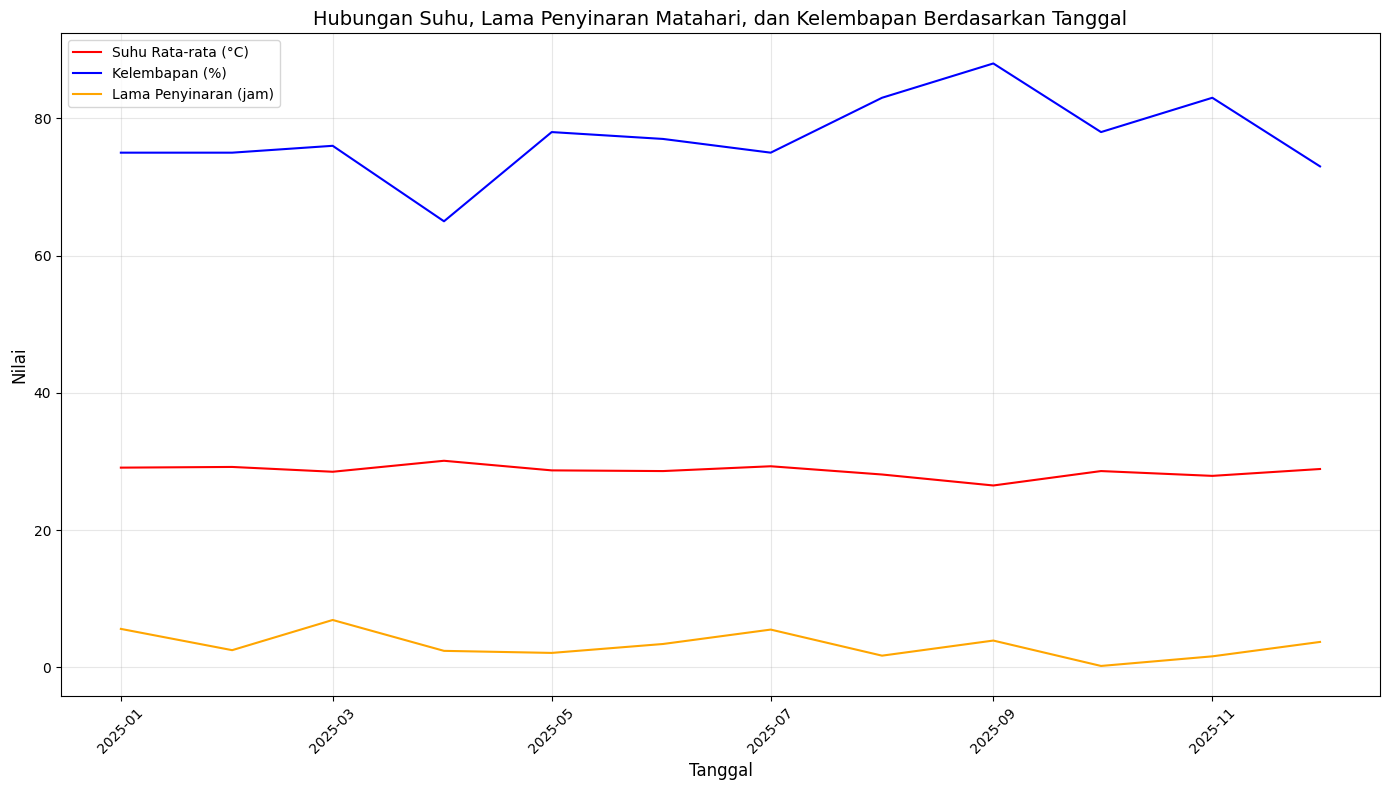

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(14, 8))

# Plot hubungan suhu dengan kelembapan
plt.plot(data_januari_2025['TANGGAL'], data_januari_2025['TAVG'], label='Suhu Rata-rata (°C)', color='red')
plt.plot(data_januari_2025['TANGGAL'], data_januari_2025['RH_AVG'], label='Kelembapan (%)', color='blue')

# Plot hubungan lama penyinaran dengan kelembapan
plt.plot(data_januari_2025['TANGGAL'], data_januari_2025['SS'], label='Lama Penyinaran (jam)', color='orange')

# Tambahkan label, judul, dan legenda
plt.title('Hubungan Suhu, Lama Penyinaran Matahari, dan Kelembapan Berdasarkan Tanggal', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Menambahkan grid
plt.grid(alpha=0.3)

# Tampilkan plot
plt.tight_layout()
plt.show()


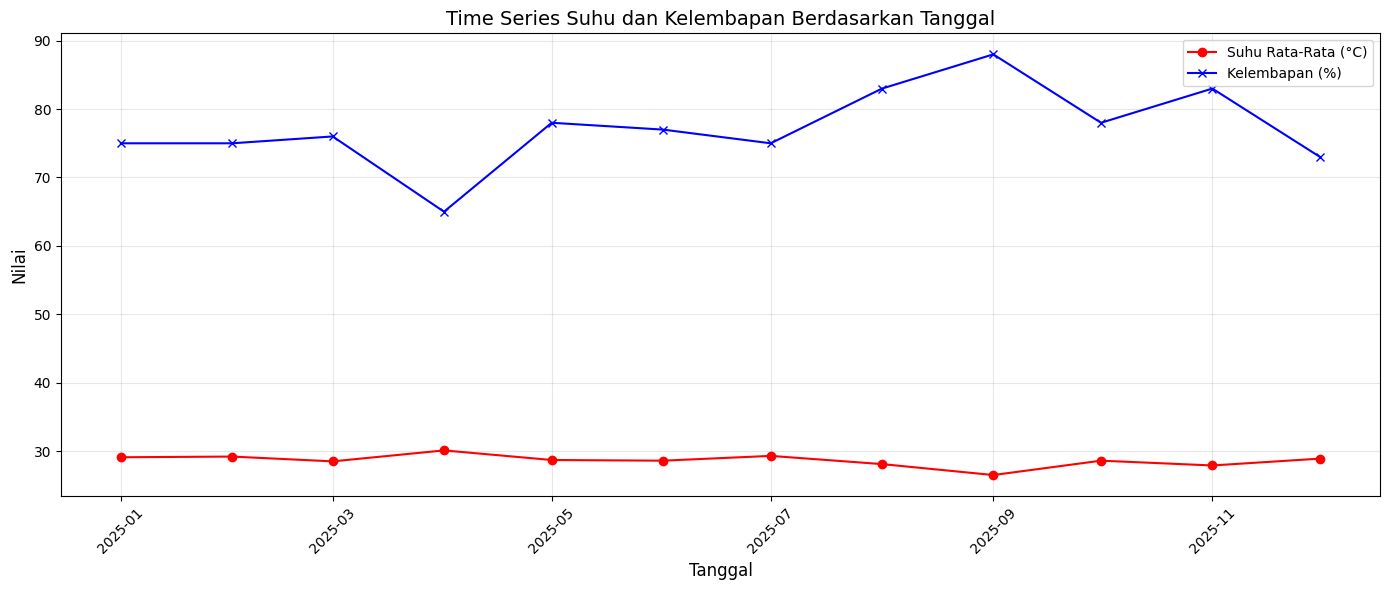

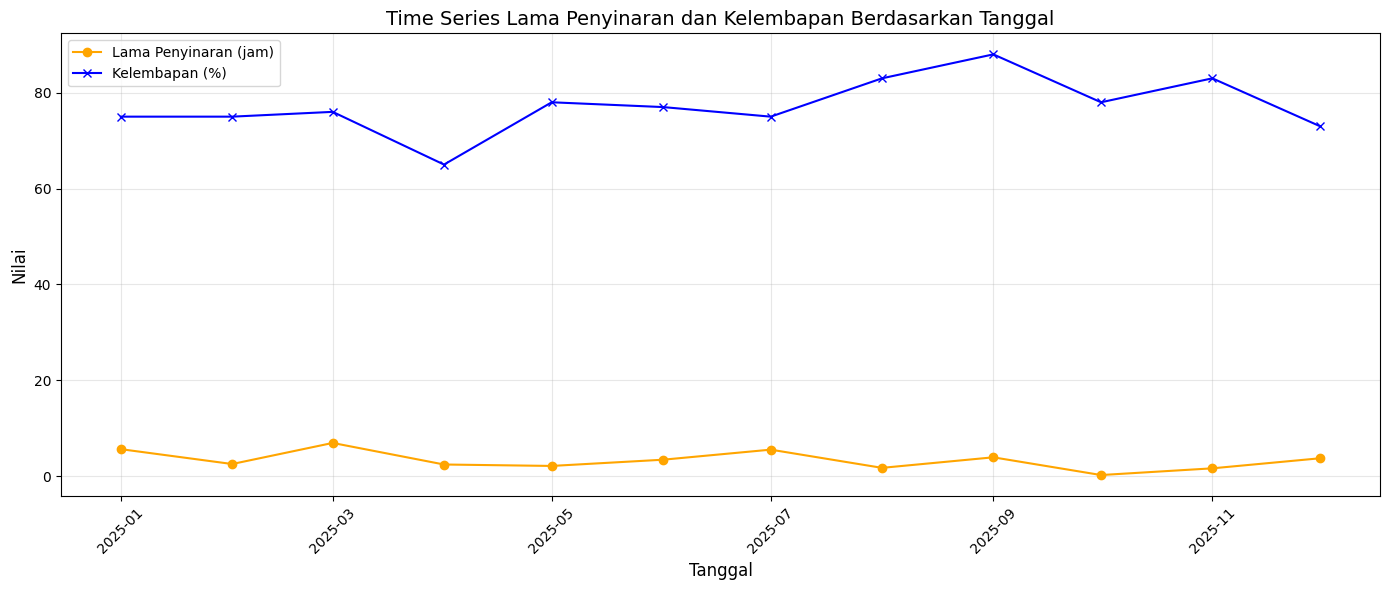

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and assign it to the alias 'plt'

# Plot suhu dan kelembapan dalam time series dengan garis
plt.figure(figsize=(14, 6))
plt.plot(data_januari_2025['TANGGAL'], data_januari_2025['TAVG'], label='Suhu Rata-Rata (°C)', color='red', marker='o')
plt.plot(data_januari_2025['TANGGAL'], data_januari_2025['RH_AVG'], label='Kelembapan (%)', color='blue', marker='x')

# Label dan judul
plt.title('Time Series Suhu dan Kelembapan Berdasarkan Tanggal', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot lama penyinaran dan kelembapan dalam time series dengan garis
plt.figure(figsize=(14, 6))
plt.plot(data_januari_2025['TANGGAL'], data_januari_2025['SS'], label='Lama Penyinaran (jam)', color='orange', marker='o')
plt.plot(data_januari_2025['TANGGAL'], data_januari_2025['RH_AVG'], label='Kelembapan (%)', color='blue', marker='x')

# Label dan judul
plt.title('Time Series Lama Penyinaran dan Kelembapan Berdasarkan Tanggal', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()